In [77]:
from pymongo import MongoClient
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter
import numpy as np
%matplotlib inline

In [24]:
client = MongoClient()
db = client.voice

In [25]:
images = [i[:-4] for i in os.listdir("mongodb/images")]

In [26]:
X = []
for i in tqdm(db.voices.find()):
    if str(i["_id"]) in images:
        try:
            author_dict = list(db.authors.find({'user': i['author']}))[0]
            X.append([author_dict[x] for x in author_dict] + [i["votes"], str(i["_id"])])
        except:
            pass

51223it [04:23, 194.62it/s]


In [27]:
data = pd.DataFrame(X)

In [28]:
data_keys = list(author_dict.keys()) + ["votes", "pronun_id"]
for i in range(len(data) - 1):
    data[data_keys[i]] = data[i]
    del data[i]

KeyError: 10

In [94]:
a = "Pronunciations: 573 (199 Best pronunciation)"
b = "Pronunciations: 25,504"

def parse_pronun(pronun):
    pronun = pronun.replace(",", "").replace("Pronunciations: ", "")
    
    if "Best pronunciation" in pronun:
        pronun = pronun.split(" (")
        pronun[0] = int(pronun[0]) 
        pronun[1] = int(pronun[1].replace(" Best pronunciation)", ""))
        return pronun
    else:
        return [int(pronun), 0]

In [95]:
parse_pronun(a)

[573, 199]

In [96]:
parse_pronun(b)

[25504, 0]

In [117]:
data

,pronun_rank,_id,visits,gender,word_rank,user,accent,votes,pronun_id,pronuns,best_pronuns,word,when_word_added,global_listenings
0,662,585fc620698f824ee334a626,61503,False,1564,mariad,Spain,0,585fda10698f828c848d862d,573,199,0_zero,2010-04-25,192
1,21737,585fc7f4698f824ee334afc3,303426,True,14,Wojtula,United States,0,585fda11698f828c848d862e,7,0,11_jedenaście,2013-05-18,638
2,9,585fc5e7698f824ee334a4ea,162426,False,998,usako_usagiclub,Japan,1,585fda11698f828c848d862f,25504,0,１１９番,2015-06-06,743
3,228,585fc8e7698f824ee334b4d5,60338,True,13400,SeanMauch,United States,0,585fda11698f828c848d8630,1765,0,12,2008-07-10,57K
4,153,585fc854698f824ee334b1ca,342195,False,641,anakat,United States,0,585fda11698f828c848d8631,2851,969,12,2008-07-10,57K
5,74,585fc643698f824ee334a6dc,295294,True,28,pleitecas,Spain,1,585fda11698f828c848d8632,6444,985,12,2008-07-10,57K
6,5438,585fc86f698f824ee334b25a,5122,True,11840,BLPS,Chile,0,585fda11698f828c848d8633,53,0,12,2008-07-10,57K
7,742,585fc621698f824ee334a62c,53856,False,284,zepyur,Iran,1,585fda11698f828c848d8634,516,1,12,2008-07-10,57K
8,948,585fc5d8698f824ee334a49e,35576,True,3611,coohrus,Brazil,1,585fda11698f828c848d8635,402,0,12,2008-07-10,57K
9,254,585fc6da698f824ee334a9f2,35192,True,1351,aimae,Portugal,0,585fda11698f828c848d8636,1595,1,12,2008-07-10,57K


In [49]:
data["votes"][2][2:]

'\n'

In [30]:
data["gender"] = list(map(lambda x: x == "Male", data["gender"]))

In [31]:
data["pronun_rank"] = list(map(lambda x: int(x.replace(",","")), data["pronun_rank"]))

In [32]:
data["visits"] = list(map(lambda x: int(x.replace(",","")), data["visits"]))

In [34]:
data["word_rank"] = list(map(lambda x:int(str(x).replace(",","")) if str(x) != 'n/a' else 0, data["word_rank"]))

In [35]:
data["votes"] = list(map(lambda x: int(x.replace(" votes", "")), data["votes"]))

In [54]:
data["votes"] = list(map(int, data["votes"]))

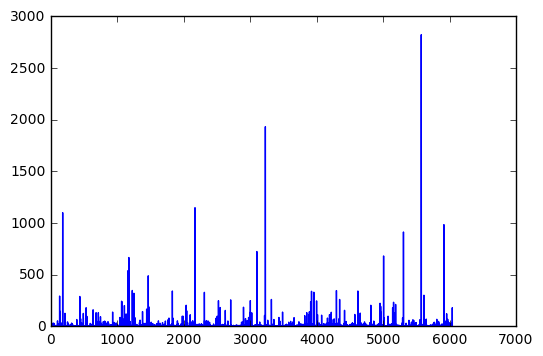

In [90]:
count = Counter(data["user"])

plt.plot(range(len([count[x] for x in count])), [count[x] for x in count])
plt.show()

In [98]:
data["pronuns"], data["best_pronuns"] = list(zip(*list(map(parse_pronun, data["pronunciations"]))))

In [100]:
del data["pronunciations"]

In [111]:
tmp_dict = list(data["pronun_id"].copy())

In [112]:
for frame in tqdm(db.words.find()):
    for i in frame["pronounces"]:
        if str(i) in tmp_dict:
            tmp_dict[tmp_dict.index(str(i))] = [frame["word"], frame["metadata"]["added"], frame["metadata"]["num_listenings"]]

28642it [01:06, 427.63it/s]


In [113]:
data["word"], data["when_word_added"], data["global_listenings"] = list(zip(*tmp_dict))

In [119]:
ids = [i[:-4] for i in os.listdir("mongodb/images")]

In [121]:
data = data[data.pronun_id.isin(ids)]

In [123]:
data.to_csv("pronuns")